In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
# Load the data
df = pd.read_csv('/content/drive/My Drive/BankChurners.csv')

# Drop the last two columns
df = df.iloc[:, :-2]

# Define the features and the target
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create a preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

# Apply preprocessing to feature columns
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the model
model = RandomForestClassifier(n_estimators=500, random_state=42)

# Train the model
model.fit(X_train_preprocessed, y_train)

# Predict on the test set
y_pred = model.predict(X_test_preprocessed)
accuracy_rf = accuracy_score(y_test, y_pred)
accuracy_rf

0.9565646594274433

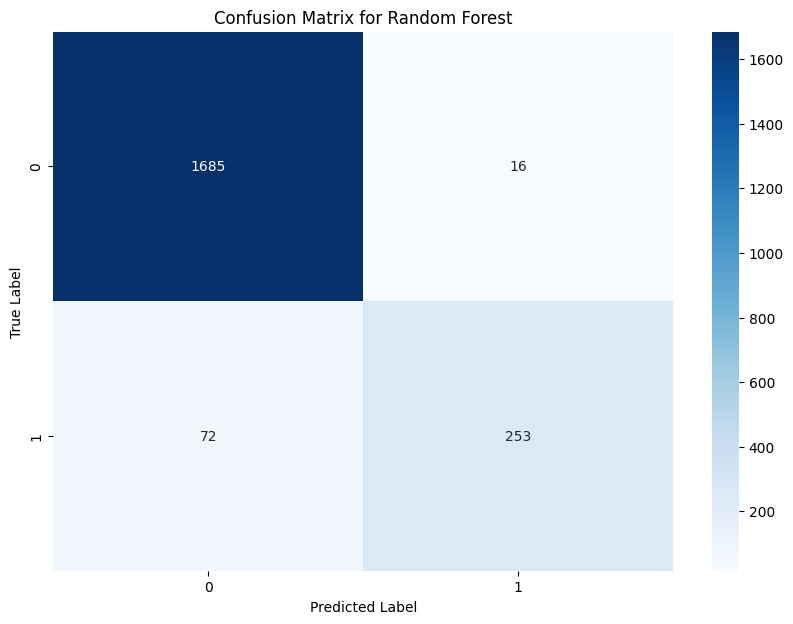

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [22]:
from sklearn.linear_model import LogisticRegression
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the preprocessed training data
logistic_model.fit(X_train_preprocessed, y_train)

# Predict on the preprocessed test data
y_pred_logistic = logistic_model.predict(X_test_preprocessed)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_logistic

0.9052319842053307

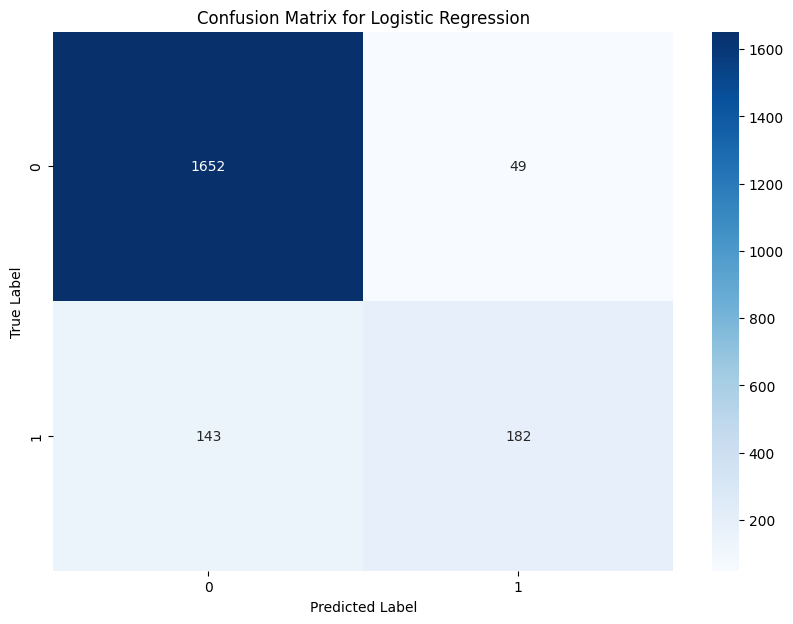

In [23]:
# Compute the confusion matrix
cm_logistic = confusion_matrix(y_test, y_pred_logistic)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model on the preprocessed training data
gb_model.fit(X_train_preprocessed, y_train)

# Predict on the preprocessed test data
y_pred_gb = gb_model.predict(X_test_preprocessed)


In [27]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
accuracy_gb

0.9629812438302073

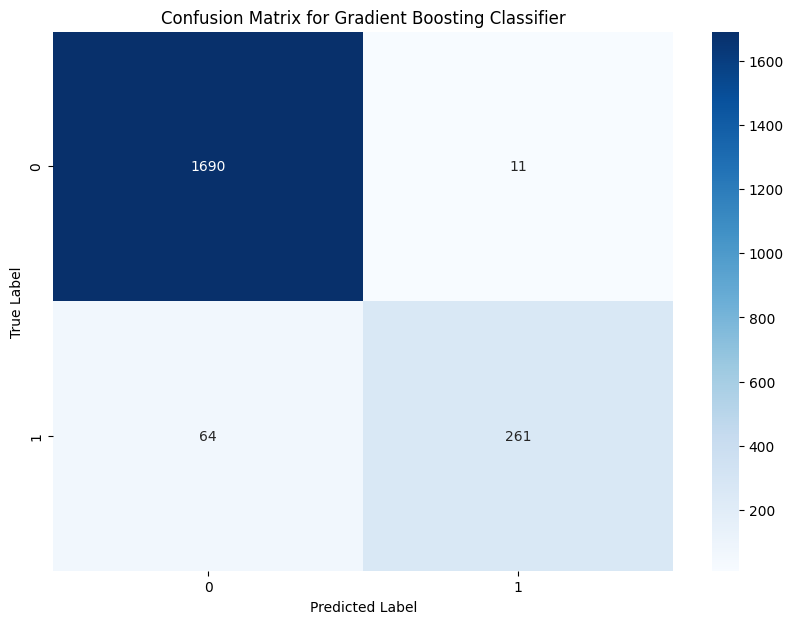

In [29]:
# Compute the confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plotting the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_gb, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [31]:
max_accuracy = max(accuracy_logistic, accuracy_rf, accuracy_gb)
if max_accuracy == accuracy_logistic:
    best_model_name = "Logistic Regression"
elif max_accuracy == accuracy_rf:
    best_model_name = "Random Forest"
else:
    best_model_name = "Gradient Boosting Classifier"

print(f"The model with the highest accuracy is {best_model_name} with an accuracy of {max_accuracy}.")

The model with the highest accuracy is Gradient Boosting Classifier with an accuracy of 0.9629812438302073.
